# Saved Searches and Alerts for the Cars Product

### The set up

In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, calendar
%reload_ext google.cloud.bigquery
magics.context.project = 'ddm-dbi'
credentials = (service_account.Credentials.from_service_account_file('DDM DBI-66ebe24de25c.json'))
magics.context.credentials = credentials

In [2]:
ss=pd.read_csv('cars_cars_saved_search_data.csv',parse_dates=[0])

C:\Users\shofmeister\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
ss.head(100)

,date,fullVisitorId,category,action,entity,Bucket
0,2019-05-11,3.227340e+18,saved search|setup an alert button,click,NaN,NaN
1,2019-05-21,3.016590e+18,saved search|setup an alert button,click,NaN,NaN
2,2019-04-30,9.626890e+17,saved search|setup an alert button,click,NaN,NaN
3,2019-05-21,1.646510e+17,saved search|setup an alert button,click,NaN,NaN
4,2019-05-22,5.921350e+18,saved search|setup an alert button,click,NaN,NaN
5,2019-05-01,9.015850e+18,saved search|setup an alert button,click,NaN,NaN
6,2019-05-08,1.391380e+18,saved search|download the app button,click,NaN,NaN
7,2019-05-19,6.665390e+18,saved search|setup an alert button,click,NaN,NaN
8,2019-05-18,6.423470e+18,saved search|download the app button,click,NaN,NaN
9,2019-05-06,6.208800e+18,saved search|setup an alert button,click,NaN,NaN


In [4]:
ss.dtypes

date             datetime64[ns]
fullVisitorId           float64
category                 object
action                   object
entity                   object
dtype: object

# Saved Searches Before Alerts

###  Saved Searches live May 23 2018

In [5]:
beforealerts = ss.query('date > 20180523 and date < 20180809', inplace = False)
val3 = beforealerts.query("category == 'save search|create start'", inplace = False).count(axis = 0)
val5 = beforealerts.query("category == 'saved search|open|srp'", inplace = False).count(axis = 0)
val6 = beforealerts.query("category == 'saved search|open|nav'", inplace = False).count(axis = 0)
val4 = beforealerts.query("category == 'save search|create success'", inplace = False).count(axis = 0)
val9 = beforealerts.query("category == 'saved search|create|srp'", inplace = False).count(axis = 0)
val10 = beforealerts.query("category == 'saved search|create|nav'", inplace = False).count(axis = 0)
val33 = val3['category']
val55 = val5['category']
val66 = val6['category']
val44 = val4['category']
val99 = val9['category']
val100 = val10['category']
totalstarts = val3+val5+val6
totalsuccess = val4+val9+val10

### Total Save Starts

In [6]:
print(totalstarts['category'])

6346


### Total Save Success

In [7]:
print(totalsuccess['category'])

6


### Conversion Rate

In [8]:
print(val44/val33)

0.0009454774661203908


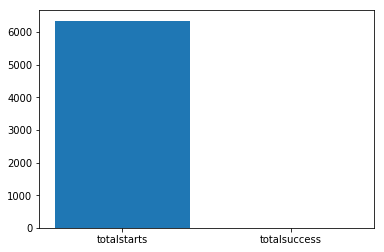

In [9]:
x = ['totalstarts','totalsuccess'] 
y = [6346,6] 
plt.bar(x,y)
plt.show() 

# Saved Searches After Alerts


### Alerts live Aug 9 2018

In [10]:
afteralerts = ss.query('date > 20180809',inplace = False)
val1 = afteralerts.query("category == 'save search|create start'", inplace = False).count(axis = 0)
val7 = afteralerts.query("category == 'saved search|open|srp'", inplace = False).count(axis = 0)
val8 = afteralerts.query("category == 'saved search|open|nav'", inplace = False).count(axis = 0)
val2 = afteralerts.query("category == 'save search|create success'", inplace = False).count(axis = 0)
val110 = afteralerts.query("category == 'saved search|create|srp'", inplace = False).count(axis = 0)
val12 = afteralerts.query("category == 'saved search|create|nav'", inplace = False).count(axis = 0)
val11 = val1['category']
val77 = val7['category']
val88 = val8['category']
val22 = val2['category']
val1110 = val110['category']
val120 = val12['category']
totalstarts1 = val1+val7+val8
totalsuccess1 = val2+val110+val12

### Total Save Starts

In [11]:
print(totalstarts1['category'])

70563


### Total Save Success

In [12]:
print(totalsuccess1['category'])

31364


### Conversion Rate

In [13]:
print(totalsuccess1['category']/totalstarts1['category'])

0.44448223573260776


### 44% Saved Search conversion rate

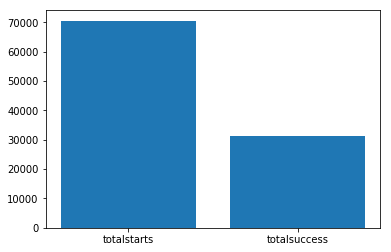

In [14]:
x = ['totalstarts','totalsuccess'] 
y = [70563,31364] 
plt.bar(x,y)
plt.show() 

In [15]:
ss_eventtotals=ss

In [16]:
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|open|srp','saved search|open|nav',
                                              'save search|create start']),'Bucket'] = 'create start' 
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|create|srp','saved search|create|nav',
                                              'save search|create success']),'Bucket'] = 'create complete'
ss_eventtotals.loc[ss_eventtotals.index.isin(['save search|create cancel']),'Bucket'] = 'create cancel - Web' 
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|delete']),'Bucket'] = 'delete start' 
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|delete cancel']),'Bucket'] = 'delete cancel'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|delete success',
                                              'save search|delete success']),'Bucket'] = 'delete complete'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|edit','save search|edit start']),'Bucket'] = 'edit start'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|edit cancel',
                                              'save search|edit cancel']),'Bucket'] = 'edit cancel'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|edit save',
                                              'save search|edit success']),'Bucket'] = 'edit complete'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|view']),'Bucket'] = 'view - App' 
ss_eventtotals.loc[ss_eventtotals.index.isin(['save search|add cancel']),'Bucket'] = 'add cancel - Web' 
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|run search']),'Bucket'] = 'run search - App' 

C:\Users\shofmeister\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
ss_eventtotals2=ss_eventtotals.groupby('Bucket')
ss_eventtotals2=ss_eventtotals2.count()

In [18]:
type(ss_eventtotals2)

pandas.core.frame.DataFrame

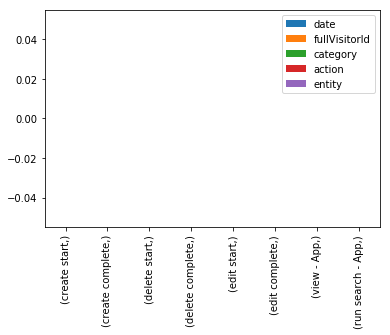

In [19]:
bucket_order = ['create start','create complete','delete start','delete complete','edit start','edit complete','view - App','run search - App']
ss_eventtotals_plot=ss_eventtotals2.reindex([bucket_order])
ss_eventtotals_plot.loc[bucket_order].plot(kind='bar')

In [47]:
ss_eventtotals_plot=ss_eventtotals2.loc[ss_eventtotals2.index.isin(['create start','create complete','delete start','delete complete','edit start','edit complete','view - App','run search - App'])]
bucket_order = ['create start','create complete','delete start','delete complete','edit start','edit complete','view - App','run search - App']
ss_eventtotals_plot[bucket_order].plot(kind='bar')

KeyError: "['create start' 'create complete' 'delete start' 'delete complete'\n 'edit start' 'edit complete' 'view - App' 'run search - App'] not in index"

## Alerts<br>

### Set up
Alert set: True|False  column 1<br>
Frequency: immediately | daily | weekly | not specified column 2

In [21]:
newactions = ss["action"].str.split("|", n = 2, expand = True)

In [22]:
type(newactions)

pandas.core.frame.DataFrame

In [23]:
newactions.columns =['action','tf', 'freq'] 

In [24]:
newactions.head(3)

,action,tf,freq
0,click,None,None
1,click,None,None
2,click,None,None


In [25]:
alertset = newactions
#vala = alertset.query("'1' == 'false'", inplace = False)
#valaa = alertset.query("'1' == 'false'", inplace = False)
#valb = alertset.query("'1' == 'true'", inplace = False)
#valc = alertset.query("2 == 'immediately'", inplace = False)
#vald = alertset.query("2 == 'daily'", inplace = False)
#vale = alertset.query("2 == 'weekly'", inplace = False)
#valf = alertset.query("2 == 'Not specified'", inplace = False)


In [26]:
type(alertset)

pandas.core.frame.DataFrame

## Frequency chosen

In [27]:
immediately=alertset.loc[alertset.freq=="immediately", :].count()[2]
print(immediately)

9583


In [28]:
daily=alertset.loc[alertset.freq=="daily", :].count()[2]
print(daily)

1216


In [29]:
weekly=alertset.loc[alertset.freq=="weekly", :].count()[2]
print(weekly)

305


In [30]:
notspecified=alertset.loc[alertset.freq=="Not specified", :].count()[2]
print(notspecified)

4205


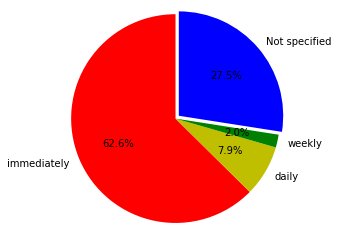

In [37]:
activities = ['immediately', 'daily', 'weekly', 'Not specified'] 
slices = [immediately, daily, weekly, notspecified] 
colors = ['r', 'y', 'g', 'b']
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, explode = (0, 0, 0, 0.05), 
        radius = 1.2, autopct = '%1.1f%%') 
#plt.legend() 
plt.show() 

## Total amount of Alerts Set

In [32]:
#alertset[alertset.tf=='true'].count()[1]

In [33]:
alertset['tf'].value_counts()[0:2]

false    39667
true     11106
Name: tf, dtype: int64

In [34]:
alertset.head(3)

,action,tf,freq
0,click,None,None
1,click,None,None
2,click,None,None


## Edits that change any facet of an alert


Event label

In [228]:
ss_events_stats=ss[['category','fullVisitorId','action']]
ss_eventgroup=ss_events_stats.groupby('action')

In [229]:
ss_eventtotals=ss_eventgroup.sum()

In [102]:
ss_eventtotals[0:11].plot(kind='bar')

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002339423DF28> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [220]:
ss_eventtotals.head()

,fullVisitorId
category,
save search|add cancel,4.191530e+17
save search|create cancel,8.092898e+22
save search|create start,3.556104e+23
save search|create success,1.445366e+23
save search|delete success,7.949943e+22


In [221]:
nav=ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|open|nav','saved search|create|nav'])]

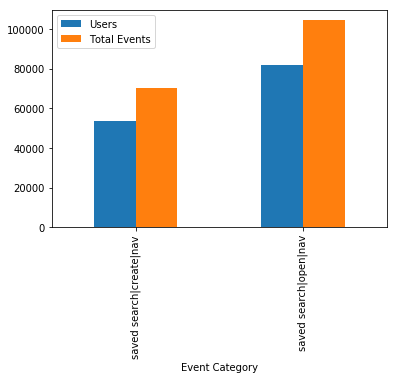

In [104]:
nav.plot(kind='bar')

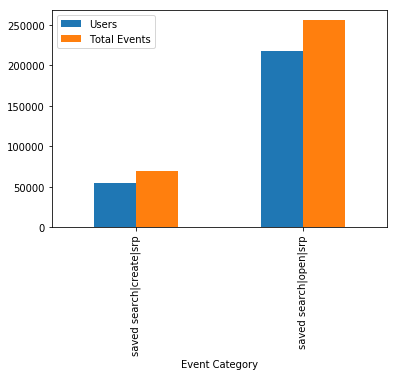

In [105]:
srp=ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|open|srp','saved search|create|srp'])]
srp.plot(kind='bar')

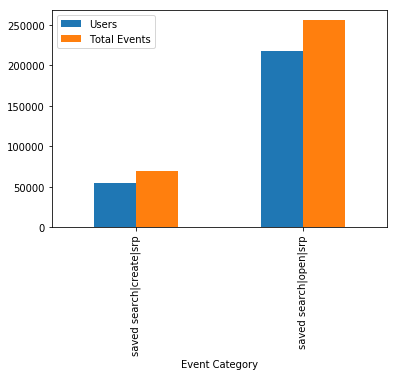

In [106]:
srp=ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|open|srp','saved search|create|srp'])]
srp.plot(kind='bar')

In [27]:
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|open|srp','saved search|open|nav']),'Bucket'] = 'start' 
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|create|srp','saved search|create|nav']),'Bucket'] = 'complete'
ss_eventtotals.loc[ss_eventtotals.index.isin(['magnifying glass|saved searches']),'Bucket'] = 'other'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|delete']),'Bucket'] = 'delete start' 
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|delete cancel']),'Bucket'] = 'delete cancel'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|delete success']),'Bucket'] = 'delete complete'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|edit']),'Bucket'] = 'edit start'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|edit cancel']),'Bucket'] = 'edit cancel'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|edit save']),'Bucket'] = 'edit complete'
ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|view']),'Bucket'] = 'view' 



In [28]:
ss_eventtotals2=ss_eventtotals.groupby('Bucket')
ss_eventtotals2=ss_eventtotals2.sum()

In [101]:
ss_eventtotals_plot=ss_eventtotals2.loc[ss_eventtotals2.index.isin(['start','complete','delete start','delete complete','edit start','edit complete','other'])]
bucket_order = ['start','complete','delete start','delete complete','edit start','edit complete','other']
ss_eventtotals_plot.plot[bucket_order].plot(kind='bar')

TypeError: 'FramePlotMethods' object is not subscriptable

In [113]:
completion_percentage=ss_eventtotals2.transpose()
completion_TE=completion_percentage.loc[completion_percentage.index.isin(['Total Events'])]
creation=completion_TE['complete']/completion_TE['start']
delete=completion_TE['delete complete']/completion_TE['delete start']
edit=completion_TE['edit complete']/completion_TE['edit start']
final_stats=pd.DataFrame([creation,delete,edit],index=['creation','delete','edit'])

In [116]:
final_stats
#final_stats.plot(kind='bar')

,Total Events
creation,0.387668
delete,0.944677
edit,0.803852


In [128]:
ss_eventtotals3=ss_eventtotals.loc[ss_eventtotals.index.isin(['saved search|create|nav','saved search|create|srp','saved search|open|nav','saved search|open|srp'])]

In [129]:
ss_eventtotals3=ss_eventtotals3.transpose()
ss_eventtotals3=ss_eventtotals3.loc[ss_eventtotals3.index.isin(['Total Events'])]


In [130]:
srps=ss_eventtotals3['saved search|create|srp']/ss_eventtotals3['saved search|open|srp']
navs=ss_eventtotals3['saved search|create|nav']/ss_eventtotals3['saved search|open|nav']
srpvnav=pd.DataFrame([srps,navs],index=['srps','navs'])
srpvnav

,Total Events
srps,0.270546
navs,0.674994


In [140]:
total_table=final_stats.append(srpvnav)
total_table

,Total Events
creation,0.387668
delete,0.944677
edit,0.803852
srps,0.270546
navs,0.674994
